## IMDB Reviews Sentiment Analysis using Glove Model and LSTM Neural Networks

### Read the dataset

In [1]:
import os
os.chdir('E:/Sindhura/Data Science-ETLhive/Projects self taught')

In [2]:
import pandas as pd
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Perform basic data quality checks

In [3]:
df.shape

(50000, 2)

In [4]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### Data Cleaning
Checking for missing values

Checking for duplicates

In [6]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df.duplicated().sum()

418

In [8]:
## Let's drop the duplicated rows
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

### Data Pre-Processing

Install necessary packages to perform preprocessing operations

In [10]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\acer\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [11]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df['review'].head(10)

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
5    Probably my all-time favorite movie, a story o...
6    I sure would like to see a resurrection of a u...
7    This show was an amazing, fresh & innovative i...
8    Encouraged by the positive comments about this...
9    If you like original gut wrenching laughter yo...
Name: review, dtype: object

### HTML tags removal
We can observe HTML tags in 'review' section of dataset. We need to remove HTML tags.

Create a function to remove tags from every review

In [13]:
tag_re = re.compile(r'<[^>+]>')

def remove_tags(text):
    return tag_re.sub('',text)

### Create a preprocessor function which will 
    a) convert entire content to lower case
    b) remove html tags 
    c) remove punchuation marks and sybmols
    d) remove isolated letters
    e) remove extra space
    f) remove stopwords

In [14]:
def preprocess_text(sentences):

    # convert entire content to lower case
    sentence = sentences.lower()

    # remove html tags     
    sentence = remove_tags(sentence)

    # remove punchuation marks and sybmols
    sentence = re.sub(r'[^a-z]',' ',sentence)

    # remove isolated letters (like a or x or d)
    sentence = re.sub(r'\s+[a-z]\s+',' ',sentence)

    # remove extra space
    sentence = re.sub(r'\s+',' ',sentence)

    # remove stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*') 
    # r'|'.join(stopwords.words('english'))-- example: It returns the|a|an where | refers to Logical OR
    sentence = pattern.sub('',sentence)

    return sentence

### Saving Preprocessed data to X

In [15]:
X = [preprocess_text(i) for i in df.review]
X[:5]

['one reviewers mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away br br would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches du

### Preprocessing Y- Sentiments

In [16]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [17]:
Y = df['sentiment'].replace({'positive':1,'negative':0}).values
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

### Perform Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,train_size=0.80,test_size=0.20,random_state=21)

In [19]:
xtrain[0:5]

['made minutes steel frontier turned glutton punishment watched next day today iron pile clothes decided finish movie punishment understand robert rodriguez shane carruth spent debut features created two remarkable movies yet two directors arguably way money churn huge steaming pile crap let see figure logic road warrior like future western get cheapest actors find mentally challenged cousin write script spend budget bunch explosions lose br br seriously think even mst guys could improve insist watching recommend getting drunk first ',
 'love science fiction fascinated egyptian mythology appreciate digital animation figured movie combines three would least enjoyable could wrong story actually lack completely uninspired lacks imagination imagination usually biggest component science fiction story dialogue acting even worse average porno movie especially thomas kretschmann gives new meaning term bad performance bad acting huge problem director bilal take seriously lines sound like suppos

In [20]:
xtest[:5]

['oh dear rarely horror film bored made laugh much one spirited start intriguing premise descends much slasher flick supernatural sexual asides usually excellent alice krige wasted one plot twists ludicrous bother unless really desperate rating ',
 'advertised expensive movie ever made czech republic automatically makes think glorified clich fear budget however budget million half movie english exactly big budget high risk movie br br grand epic tale centered around friendship two people younger karel older frantisek pilots czech air force germans invade beginning world war ii escape country england joined raf br br friendship becomes strained love woman however bond friendship goes beyond merely friendly friendship elegant metaphor attitude czech people country remember winners defeated germans invaded russians br br funny exciting intriguing beautiful sad illuminating movie one favourite war movies like way make fun british way amazingly affectionate gives amazing insight way british

In [21]:
ytrain[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [22]:
ytest[:5]

array([0, 1, 0, 0, 1], dtype=int64)

### Install necessary packages to proceed with text preprocessing

In [23]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\acer\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [24]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\acer\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


--------------------------------------------------------------------------
We are using Tokenizer to divide the sentences into a list of words.

fit_on_texts:
The fit_on_texts method is used to create the vocabulary index based on the frequency of words in corpus (collection of texts).It will then count the occurrences of each word across all texts.And then it assigns a unique integer index to each word based on its frequency, with the most frequent word getting the smallest index (typically starting from 1).For example, 
``` python
texts = [
    'Hello, how are you?',
    'I am doing well, thank you!',
    'What is your name?',
    'My name is xxxx.'
]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

output: {'is': 1, 'name': 2, 'hello': 3, 'how': 4, 'are': 5, 'you': 6, 'i': 7, 'am': 8, 'doing': 9, 'well': 10, 'thank': 11, 'what': 12, 'your': 13, 'my': 14, 'xxxx': 15}

texts_to_sequences: The texts_to_sequences method converts text into sequence of integers where each integer corresponds to a word (based on the word_index created by fit_on_texts). For example,

xtrain = tokenizer.texts_to_sequences(xtrain)
print(xtrain)

Output:
[3, 4, 5, 6]
[7, 8, 9, 10, 11]
[12, 1, 13, 2]
[14, 2, 1, 15]

```


In [25]:
from keras.preprocessing.text import Tokenizer
words = Tokenizer()
words.fit_on_texts(xtrain) 

xtrain = words.texts_to_sequences(xtrain)
xtest = words.texts_to_sequences(xtest)

In [26]:
xtrain[0][:5]

[21, 122, 4033, 6604, 531]

In [27]:
words.word_index

{'br': 1,
 'movie': 2,
 'film': 3,
 'one': 4,
 'like': 5,
 'good': 6,
 'time': 7,
 'even': 8,
 'would': 9,
 'story': 10,
 'really': 11,
 'see': 12,
 'well': 13,
 'much': 14,
 'bad': 15,
 'get': 16,
 'great': 17,
 'people': 18,
 'also': 19,
 'first': 20,
 'made': 21,
 'make': 22,
 'way': 23,
 'could': 24,
 'movies': 25,
 'characters': 26,
 'think': 27,
 'watch': 28,
 'character': 29,
 'films': 30,
 'two': 31,
 'many': 32,
 'seen': 33,
 'never': 34,
 'love': 35,
 'life': 36,
 'acting': 37,
 'plot': 38,
 'show': 39,
 'little': 40,
 'best': 41,
 'know': 42,
 'ever': 43,
 'man': 44,
 'better': 45,
 'end': 46,
 'scene': 47,
 'still': 48,
 'say': 49,
 'scenes': 50,
 'go': 51,
 'something': 52,
 'back': 53,
 'real': 54,
 'watching': 55,
 'thing': 56,
 'actors': 57,
 'years': 58,
 'director': 59,
 'though': 60,
 'funny': 61,
 'another': 62,
 'work': 63,
 'old': 64,
 'nothing': 65,
 'actually': 66,
 'makes': 67,
 'look': 68,
 'find': 69,
 'going': 70,
 'new': 71,
 'every': 72,
 'lot': 73,
 'part

### Get Vocab length

In [28]:
vocab_len = len(words.word_index) + 1
vocab_len

90513

### Perform padding on your sequences

Before feeding the extracted texts to the Neural Network model, padding method is used inorder to maintain uniformity in the data.

Padding method ensures that all sequences are of the same length.It pads shorter sequences with a special token(0) and truncates longer sequences. 

input: input sequences

maxleng: We provided maximum length of each sequence, which either pads or truncates the sequence based on its size.

padding: Specifies whether to pad sequences at the beginning (pre) or at the end (post) of the sequences.

truncating: Determines how to truncate sequences longer than maxlen (either pre or post).

In [29]:
from keras.utils import pad_sequences
maxlen= 100
xtrain = pad_sequences(xtrain,maxlen,padding='post')
xtest = pad_sequences(xtest,maxlen,padding='post')

In [30]:
xtrain[0]

array([   21,   122,  4033,  6604,   531, 23643,  3799,   183,   249,
         141,   366,  3758,  2431,  1534,   721,  1215,     2,  3799,
         260,   471,  8218,  9722, 56416,   838,  1903,   783,   895,
          31,  1656,    25,   134,    31,   817,  4588,    23,   180,
       14146,   497,  8219,  2431,   457,   168,    12,   710,  2029,
        1053,  3782,     5,   586,   723,    16, 10935,    57,    69,
        2653,  4182,  2793,   750,   119,   986,   212,   619,  3474,
        1466,     1,     1,   478,    27,     8,  2625,   328,    24,
        3997,  6605,    55,   257,   262,  1755,    20,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0])

### Import the embeddings from the GLOVE model

In [31]:
from numpy import asarray,zeros

In [32]:
zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [33]:
embedding_dictionary = dict()
glove_file = open('glove.6B.100d.txt',encoding='utf-8')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimension = asarray(records[1:],dtype='float32')
    embedding_dictionary[word] = vector_dimension
glove_file.close()

In the above code, we are using pre-trained Glove model to create a dictionary of words and their corresponding vector values.

embedding_dictionary : created an empty dictionary where we will store word embeddings.

glove_file: Loaded the pre-trained Glove file 'glove.6B.100d.txt' where each line starts with a word followed by its embeddings vector values.

for line in glove_file : Used for loop to iterate through each line in the file.

records = line.split() : Each line starts with a word, followed by its embedding vector values. So we are splitting the contents to access records[0] and records[1:]

word = records[0] : We are storing the word situated at records[0] position

vector_dimension = asarray(records[1:],dtype='float32') : Numpy asarray converts embedded values stored at records[1:] position into array

embedding_dictionary[word] = vector_dimension : Stores the word as key and vector array as values in embedding_dictionary dictionary 

glove_file.close(): close the file

### Embedding matrix creation

In [34]:
embedding_matrix = zeros((vocab_len,100))
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
for word,index in words.word_index.items():
    embedding_vector = embedding_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [36]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.19788   ,  0.25264999, -0.28308001, ..., -0.44062999,
        -0.74264997, -0.3215    ],
       [ 0.38251001,  0.14821   ,  0.60601002, ...,  0.058921  ,
         0.091112  ,  0.47283   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [37]:
embedding_matrix.shape

(90513, 100)

### Build the Neural Network

In [38]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,LSTM

In [39]:
# Model
lstm_model = Sequential()

# Layer1 : Add Embedding layer
embedding_layer = Embedding(input_dim=vocab_len,output_dim=100,weights= [embedding_matrix],input_length=maxlen,trainable=False)
lstm_model.add(embedding_layer)

# Layer2 : Add LSTM
lstm_model.add(LSTM(128))

# Layer3: Add Dense layer
lstm_model.add(Dense(1,activation='sigmoid'))

In [40]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9051300   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 9168677 (34.98 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 9051300 (34.53 MB)
_________________________________________________________________


### Compile the model

In [41]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
hist = lstm_model.fit(xtrain,ytrain,validation_split=0.2,epochs=15,batch_size=128)

Epoch 1/15
248/248 [==============================] - 105s 407ms/step - loss: 0.5115 - accuracy: 0.7498 - val_loss: 0.4400 - val_accuracy: 0.7965
Epoch 2/15
248/248 [==============================] - 98s 397ms/step - loss: 0.4186 - accuracy: 0.8134 - val_loss: 0.4619 - val_accuracy: 0.8117
Epoch 3/15
248/248 [==============================] - 98s 397ms/step - loss: 0.3763 - accuracy: 0.8375 - val_loss: 0.4327 - val_accuracy: 0.7817
Epoch 4/15
248/248 [==============================] - 98s 396ms/step - loss: 0.3455 - accuracy: 0.8538 - val_loss: 0.3533 - val_accuracy: 0.8472
Epoch 5/15
248/248 [==============================] - 98s 396ms/step - loss: 0.3178 - accuracy: 0.8669 - val_loss: 0.3546 - val_accuracy: 0.8581
Epoch 6/15
248/248 [==============================] - 98s 394ms/step - loss: 0.3038 - accuracy: 0.8739 - val_loss: 0.3350 - val_accuracy: 0.8587
Epoch 7/15
248/248 [==============================] - 97s 393ms/step - loss: 0.2863 - accuracy: 0.8818 - val_loss: 0.3336 - val_a

### Plot the learning curve

In [47]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\acer\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


Matplotlib is building the font cache; this may take a moment.


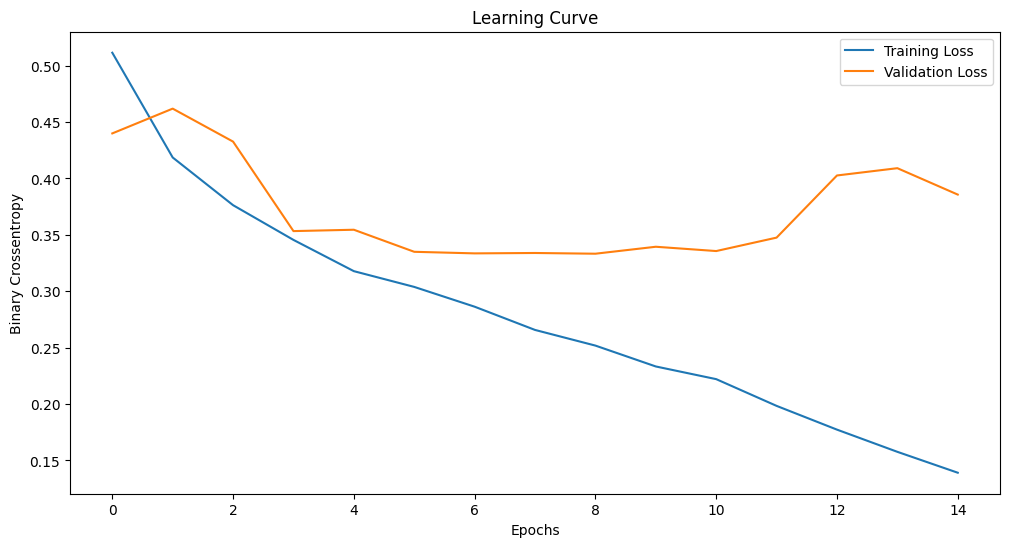

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Evaluate the model

In [49]:
lstm_model.evaluate(xtrain,ytrain)

1240/1240 [==============================] - 121s 98ms/step - loss: 0.1795 - accuracy: 0.9384


[0.17950904369354248, 0.938383936882019]

In [50]:
lstm_model.evaluate(xtest,ytest)

310/310 [==============================] - 22s 70ms/step - loss: 0.3676 - accuracy: 0.8555


[0.3675791323184967, 0.8555006384849548]

### Predict test data

In [51]:
yprobs_test = lstm_model.predict(xtest)

310/310 [==============================] - 23s 61ms/step


In [52]:
ypred_test = []

for i in yprobs_test:
    if i>=0.5:
        ypred_test.append(1)
    else:
        ypred_test.append(0)

In [53]:
ypred_test[:5]

[0, 1, 0, 0, 1]

In [54]:
ytest[:5]

array([0, 1, 0, 0, 1], dtype=int64)

### Let's build Confusion matrix and Classification report to check the f1 score accuracy

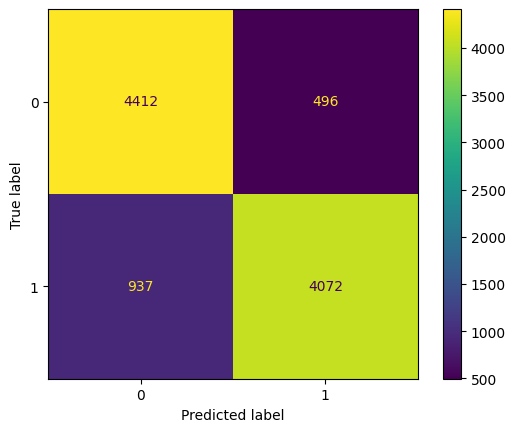

In [55]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_test)
ConfusionMatrixDisplay(cf).plot()

In [56]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4908
           1       0.89      0.81      0.85      5009

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



### Predict the model with unseen data

In [58]:
sample_df = pd.read_csv('a3_IMDb_Unseen_Reviews.csv')
sample_df.head()

,Unnamed: 0,Movie,Review Text,IMDb Rating
0,0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9
1,1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10
2,2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3
3,3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1
4,4,Eternals,Amazing visuals and philosophical concepts!\n\...,10


In [59]:
unseen_reviews = sample_df['Review Text']
unseen_reviews

0    Intelligent Movie.\nThis movie is obviously al...
1    Extraordinary and thought-provoking.\n'Ex mach...
2    Poor story, only reasonable otherwise.\nIf I h...
3    Had Great Potential.\nThis movie is one of the...
4    Amazing visuals and philosophical concepts!\n\...
5    Worst MCU film ever\n\nFollowing the events of...
Name: Review Text, dtype: object

Let's use the above defined 'preprocess_text' function to preprocess the review text from unseen_reviews list

In [60]:
unseen_pre = []

for i in unseen_reviews:
    unseen_pre.append(preprocess_text(i))
unseen_pre

['intelligent movie movie obviously allegorical fascinating tale ai mainly manipulation power wanting action spectacular cgi movie aimed people like think rather passively wait entertained themes ai also surveillance excellent points data us collected phone companies search engine companies commercial operating systems makers plot seems simple extremely clever protagonist playing games trying stay one step ahead one another movie perfectly consistent internal logic plays perfectly go expecting much however see people satisfied movie sets brilliantly therefore give least recent movies getting movie succeeds another recent movie ai transcendence think called failed interesting failure third movie ai spanish movie called eva also brilliant eva moving movie philosophical movies perfect different ways ai name movie ava seems nod title spanish movie aside nice stars appeared ex machina eva casting great course several aspects movie unrealistic often absurd allegorical movie acceptable movie 

In [61]:
## Performing tokenization and padding 
unseen_tokenized = words.texts_to_sequences(unseen_pre)
unseen_padded = pad_sequences(unseen_tokenized,maxlen,padding='post')

In [62]:
unseen_padded[-1]

array([  137,     3,    43,   837,   571, 14632, 29554,  1958,  1435,
        1772,  2170,  1801,   452,   556,   840,  2817,    58,  3176,
        8947,  4323,  2170,  2079, 30428,     3,   118,   137,     3,
          28,  2332,  3549,   555, 18517,   355,  4844, 16873,    15,
          10,   859,    67,   295,   169,  5073,    26,    40,   103,
       13411,  1245,  2846,    15,     3,   215,  2236, 29554,  6136,
         101,  1434,    13,  4111,   668,  4394,   462, 13495,     6,
           2,    67,  1395,  5458,  3758,    44,    68,     6,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0])

### Predict the target feature - sentiments

In [63]:
sentiments = lstm_model.predict(unseen_padded)
sentiments

1/1 [==============================] - 0s 96ms/step


array([[0.9645251 ],
       [0.9996777 ],
       [0.04073429],
       [0.04695107],
       [0.9950991 ],
       [0.00474196]], dtype=float32)

In [64]:
imdb_reviews = sentiments*10
imdb_reviews

array([[9.645251  ],
       [9.996778  ],
       [0.40734288],
       [0.4695107 ],
       [9.950992  ],
       [0.0474196 ]], dtype=float32)

In [65]:
final_sentiment = []
for i in sentiments:
    if i >=0.5:
        final_sentiment.append('Positive')
    else:
        final_sentiment.append('Negative')

In [66]:
final_sentiment

['Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative']

In [67]:
sample_df['LSTM Sentiments'] = imdb_reviews
sample_df['Final Sentiments'] = final_sentiment

In [68]:
sample_df

,Unnamed: 0,Movie,Review Text,IMDb Rating,LSTM Sentiments,Final Sentiments
0,0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9,9.645251,Positive
1,1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10,9.996778,Positive
2,2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3,0.407343,Negative
3,3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1,0.469511,Negative
4,4,Eternals,Amazing visuals and philosophical concepts!\n\...,10,9.950992,Positive
5,5,Eternals,Worst MCU film ever\n\nFollowing the events of...,3,0.047420,Negative


### Save the model for future use

In [69]:
lstm_model.save('IMDB-Review_SentimentAnalysis Model.keras')